<center><h1>Graph project: Epidemic spreading</h1></center>

<center><h4>ENSEEIHT SN</h4></center>

<div style="width:75%;margin:0 auto;">
    
## Introduction
<a id='intro'></a>
    
<p style="text-align:justify;"> As you know, a new epidemic has overwhelmed the world, COVID-19 jeopardizes people and changes our habits. It is easy to realise that knowing how illnesses spread is vital to our own protection. How can we predict whether a disease will cause an epidemic, how many people it will infect, which people it will infect, and whether or not it is dangerous to society as a whole ? Also, how can we determine which techniques to use in fighting an epidemic once it begins ? One way to answer all of these questions is through <strong>mathematical modeling</strong>. </p>

<p style="text-align:justify;"> In this work you will have to review different epidemic modelings relying all on the representation by graphs of a human network called a <strong>contact network</strong>. A vertex in a contact network represents an individual and an edge between two vertices represents a contact between two individuals. The disease only spread from individual to individual if they are in contact, so through the edges. This representation is actually really common in research, and a lot of state-of-the-art modeling are built over it. From these different models you will be asked to draw conclusions from experiments on varying contact networks</p>

<p style="text-align:justify;"> For readability and ease of use, this project will be carried on a Jupyter Notebook, hence code and question answering have to be written in this unique file. This is a <strong>DUO</strong> project, no group of one person will be accepted, the duo has to be composed of same TD group students, if the number of students in the TD group is odd we will accept one group composed of three students. It will be coded in Julia using the LightGraphs package. <strong>BEWARE:</strong> 
    
- If the code does not provide good results, its readability as well as its comments are essential for the corrector to potentially find some notation points.
- The specifications of the functions have to be strictly respected.
- Do not neglect written questions they stand for an important part of the notation, you are not only evaluated on the coding. Also, even so a written question may not ask you directly to code or provide results from code, support your arguments when possible with a runable example is very welcome and sometimes even expected.
- Any initiatives and additional efforts bringing contents and thoughts out of the question scope may result in bonus points if pertinent.
</p> 
    
<p style="text-align:justify;"> Deliverable: You will deliver your work on moodle before <strong style="font-size:1.3em">23.01.2022</strong> in a <strong style="font-size:1.3em">.tar</strong> containing the notebook with your codes and your written answers, and the different graph figures in .png you will generate. The corrector will use the student N7 computers for running your code, so take care of verifying that your work is running as expected on these computers !</p>

LightGraphs documentation: https://juliagraphs.org/LightGraphs.jl/v1.2/index.html
    
<!---
http://makie.juliaplots.org/stable/basic-tutorial.html#Adding-plots-to-a-Scene
TODO: afficher l'historique gplot des graphes durant la simu pour voir visuellement ce que ça donne. Peut etre necessiter de locker l'affichage graphique.
afficher pour tau fixer sur different graphe de degré le nombre max d'infecté durant la simu.
    
Faire coder le modèle SAIS et SIR

    Pour SIR faire la courbe dans un des sites dans les favoris
    
    Expliquer en quoi la distance et Jordan ne sont pas tout le temps optimal. Expliquer pourquoi le DMP peut présenter de meilleur résultat.

Demander d'imaginer d'autres modèle inspirer de maladie
--->

<div style="width:75%;margin:0 auto;">

## Environment and packages installation
<a id='env'></a>
    

<p style="text-align:justify;"> <strong>IMPORTANT</strong>: For evaluation, coding questions have to run with no additional packages ! Only the ones present here ! However if you want to use another package to go further in your answer and add bonus contents, take care of separating the cells and precising which packages you are using.</p>

In [1]:
using Pkg
Pkg.activate(".") # Path to Manifest.toml and Project.toml
Pkg.resolve()
Pkg.add("Graphs")

  Activating project at `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes`


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


In [2]:
# Import packages
using Pkg
Pkg.activate(".") # Path to Manifest.toml and Project.toml

import Pkg; Pkg.add("GraphPlot")
Pkg.add("Colors")
Pkg.add("CairoMakie")
Pkg.add("StatsBase")
Pkg.add("Plots")
Pkg.add("JLD2")
Pkg.add("Compose")
Pkg.add("Graphs")
using GraphPlot
using Colors
using CairoMakie
using StatsBase
using Plots
using JLD2
using Compose
using Graphs

  Activating project at `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes`
   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


   Resolving package versions...


  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Project.toml`
  No Changes to `~/ladeuxiemeanneealenseeiht/graphe/projet v2/Projet Graphes/Manifest.toml`


<div style="width:75%;margin:0 auto;">

## Part 1 - SIS model
<a id='part1'></a>

<p style="text-align:justify;">SIS is a compartmental model, ie a model where the population is divided into subgroups that represent the disease status of its members. SIS stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Susceptible where the susceptible group contains those who remain susceptible to the infection, and the infected group consists of those who not only have the disease but are also in the contagious period of the disease.</p>
    
<p style="text-align:justify;"> Combine with a contact network approach, this model can capture contact patterns (family, company, friends). Each vertex represents an individual in the host population, and contacts between two individuals are represented by an edge that connects the two. The probability of transmitting the disease from an infected to a susceptible individual along one of these edges or contacts is $\beta$ (=<strong>infection rate</strong>). The probability to cure is $\alpha$ (= <strong>curing rate</strong>). </p>

    
<p style="text-align:justify;">In order for a disease to begin spreading through a network, the disease must be introduced into the population, either through infecting a proportion of the population or through infecting one individual. As time moves forward, the disease will spread away from those initially infected, and two things may occur simultaneously at each time step $t$. First, each infected individual will spread disease to each of its contacts with a probability $\beta$. Secondly, each infectious individual will recover at a rate, $\alpha$ , at which point the individual will then no longer infect any of its contacts. After the disease has run its course, we can determine how the disease affected the network by calculating various quantities that help us better understand the outbreak.
</p>

<br>
    
<p style="font-size:0.9em">P. Van Mieghem, J. Omic, R. E. Kooij, <em>“Virus Spread in Networks”</em>,
IEEE/ACM Transaction on Networking (2009)<p>


<!---
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font size = 4.5px><b>Algorithm 1:</b> Girvan Newman</font><br>
    <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
    <b> WHILE </b> there are still edges<b> OR </b> desired nb of communities unreached <b>DO</b>
        <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
        Calculate betweeness of all edges <br>
        Remove the edge with the highest betweeness <br>
        Calculate the number of strongly connected components
        </div>
    <b> END WHILE </b>   
    </div>
</div>
--->

<div style="width:75%;margin:0 auto;">

### 1.1 Contact networks sample

In [3]:
"""karat7: A graph representing the karate club of N7 and the connections between the persons in this club.
There are 34 people in this network. It is actually inspired by one of the most famous problem in graph
theory: the Zachary's karate club.
"""
karat7 = smallgraph(:karate)
nodecolor = [colorant"lightseagreen"]
draw(PNG("karat7.png", 100cm, 100cm), gplot(karat7,nodefillc=nodecolor))

In [4]:
"""n7_2A: A graph representing the second year students at N7. Each department (SN, MF2E, 3EA) form a 
community where connections are denser, connections between department are rarer.
"""
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
nodecolor = [colorant"lightseagreen"]
draw(PNG("n7_2A.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [5]:
"""toulouse_neigh: A graph representing a neighborhood composed of 1000 people in Toulouse.
"""
toulouse_neigh = barabasi_albert(1000, 1)
nodecolor = [colorant"lightseagreen"]
draw(PNG("toulouse_neigh.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">
  
### 1.2 Introduce the infection
    
<p style="text-align:justify;">We denote by <code>state</code> a vector containing the disease status of each vertex where Susceptible=0 and Infected=1. Then <code>state</code> is an <code>Array{Int32,1}</code> of length the number of vertices. This array in addition of a graph (represented internally by an adjacency matrix or an adjacency list) will be the data structure of our model.</p>
    
<span style="font-size:0.9em">In <code>Array{Int32,1}</code>, <code>Int32</code> refers to the kind of data in the array, here 32 bits integers, <code>1</code> refers to the dimension of the array, here we have a 1-dimensional structure so a vector.</span>

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 1 (code):</strong> For each graph in the graph sample (<code>karat7</code>, <code>n7_2A</code>, <code>toulouse_neigh</code>) initialize the state array by assigning each vertex to susceptible and add randomly one or numerous infected people. Save the graph as a .png image using <code>gplot</code> and <code>draw</code>, infected should appear in a different color (<code>colorant"orange"</code>).
    
Due to a bug on certain version of Jupyter Notebook, the graph <span style="font-size:1.3em">figures should be saved in a file and not plot inside the notebook </span> !!!
    
Gplot GitHub: https://github.com/JuliaGraphs/GraphPlot.jl
    
Gplot examples: https://juliagraphs.org/GraphPlot.jl/

In [6]:
# Infect Karat7

state_k7 = zeros(Int32, nv(karat7))
nb_infected = rand(1:nv(karat7)÷2,1) # We limit the initial number of infected to half of the population
infected = rand(1:nv(karat7), nb_infected[1])
state_k7[infected] = ones(Int32, nb_infected[1])

nodecolor = [colorant"lightseagreen", colorant"orange"]
nodefillc_k7 = nodecolor[state_k7 .+ 1]

draw(PNG("karat7_infected.png", 100cm, 100cm), gplot(karat7, nodefillc=nodefillc_k7))

In [7]:
# Infect N7_2A

state_2a = zeros(Int32, nv(n7_2A))
nb_infected = rand(1:nv(n7_2A)÷2,1)
infected = rand(1:nv(n7_2A), nb_infected[1])
state_2a[infected] = ones(Int32, nb_infected[1])

nodecolor = [colorant"lightseagreen", colorant"orange"]
nodefillc_2a = nodecolor[state_2a .+ 1]

draw(PNG("n7_2A_infected.png", 100cm, 100cm), gplot(n7_2A, nodefillc=nodefillc_2a))


In [8]:
# Infect Toulouse_neigh

state_tls = zeros(Int32, nv(toulouse_neigh))
nb_infected = rand(1:nv(toulouse_neigh)÷2,1)  
infected = rand(1:nv(toulouse_neigh), nb_infected[1])
state_tls[infected] = ones(Int32, nb_infected[1])

nodecolor = [colorant"lightseagreen", colorant"orange"]
nodefillc_tls = nodecolor[state_tls .+ 1]

draw(PNG("toulouse_neigh_infected.png", 100cm, 100cm), gplot(toulouse_neigh, nodefillc=nodefillc_tls))

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 2 (written):</strong> What do you think/predict about the influence of the initial number of infected people and their locations on the evolution of an SIS model epidemic ?

<br>
    
<div style="background-color:#E7F1D1"><strong>Answer:</strong>Plus le nombre d'infecté initial est élevé, plus la propagation de la maladie sera rapide. Plus un individu infecté a de connections, plus la propagation sera rapide également. Si un individu appartient a plusieurs groupes (exemple un 2a SN qui a des connections avec un 2A hydro) cela va aussi faciliter la propagation de la maladie sur l'ensemble du réseau.</div> 

<div style="width:75%;margin:0 auto;">
  
### 1.3 Spread the infection

<div style="width:75%;margin:0 auto;">
      
<strong style="color:cornflowerblue">Question 3 (code):</strong> Implement the <code>function SIS</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$.
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIS(net,state,beta,alpha,t)</code> with your code.</span>

In [9]:
function SIS(net,state,beta,alpha,t)
    """Take a contact network at a certain state and apply t time steps
    of an SIS model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """     

    new_state = copy(state)

    for i in 1:t
        # Infection
        for j in 1:nv(net)
            if new_state[j] == 0 # Susceptible
                for k in neighbors(net,j) 
                    if state[k] == 1    # Infected neighbors
                        if rand() < beta
                            new_state[j] = 1
                            break
                        end
                    end
                end
            end
        end
        
        # Cure
        for j in 1:nv(net)
            if new_state[j] == 1 
                if rand() < alpha
                    new_state[j] = 0
                end
            end
        end
    end

    return new_state
end




SIS (generic function with 1 method)

In [10]:
# Test on Karat7

new_state_k7 = SIS(karat7,state_k7,0.7,0.3,10)

new_nodefillc_k7 = nodecolor[new_state_k7 .+ 1]
draw(PNG("karat7_infected_10.png", 100cm, 100cm), gplot(karat7, nodefillc=new_nodefillc_k7))

In [11]:
# Test on N7_2A

new_state_2a = SIS(n7_2A,state_2a,0.7,0.3,10)

new_nodefillc_2a = nodecolor[new_state_2a .+ 1]
draw(PNG("n7_2A_infected_10.png", 100cm, 100cm), gplot(n7_2A, nodefillc=new_nodefillc_2a))

In [12]:
# Test on Toulouse_neigh

new_state_tls = SIS(toulouse_neigh,state_tls,0.7,0.3,10)

new_nodefillc_tls = nodecolor[new_state_tls .+ 1]
draw(PNG("toulouse_neigh_infected_10.png", 100cm, 100cm), gplot(toulouse_neigh, nodefillc=new_nodefillc_tls))

<div style="width:75%;margin:0 auto;">

### 1.4 Simulate and understand the epidemic
    
<p style="text-align:justify;">In the SIS model of this project, every disease is characterized by:
    
* The infection rate $\beta$ representing the chance of infection when being in contact with an infected individual.
* The curing rate $\alpha$ representing the chance of being cured of the disease.
* The effective spreading rate $\tau=\frac{\beta}{\alpha}$ representing the capacity of the disease to spread. More the disease infect easily ($\beta$ high) and less it is cured easily ($\alpha$ low) more $\tau$ can be high.

We are now willing to understand what are the influences of these parameters as well as the contact network shape on an epidemic.</p>

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 4 (written):</strong> The <code>function SIS</code> you implemented launches one run of an SIS model on a given contact network. As it makes use of randomness, one run of spreading is stochastic. Then what simple method can you propose to provide a prediction of the disease spreading on a given contact network ?

<br>
    
<div style="background-color:#E7F1D1"> <Strong>Answer: On peut faire une moyenne sur plusieurs runs pour avoir une idée de la propagation de la maladie sur le réseau. On peut faire par exemple la moyenne des pourcentages de nombre de personnes infectées à chaque itération sur plusieurs runs.
Plus le nombre de runs est élevé, plus la prédiction sera fiable.</Strong></div>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 5 (code):</strong> Implement the <code>function Simulation_SIS</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

In [13]:
function Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SIS over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas (Array{Float64,1}): array of infection rate on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,2}): the prediction of the percentage of 
            infected at each time step and for each disease. The 
            first dimension contains the time steps and the second
            contains the diseases
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    
    # Initialization
    nb_diseases = length(betas)
    n = nv(net)
    
    # Prediction of the percentage of infected
    prediction = zeros(t,nb_diseases)

    # Effective spreading rate
    taus = betas ./ alphas
    
    # Simulation

    for i in 1:nb_diseases
        for j in 1:nbsimu
            # Initialization
            state = zeros(Int32, n)
            infected = rand(1:n, nbinf)
            state[infected] = ones(Int32, nbinf)
            
            # Simulation
            for k in 1:t
                state = SIS(net,state,betas[i],alphas[i],1)
                prediction[k,i] += (sum(state) / n)*100
            end
        end
    end

    prediction = prediction ./ nbsimu

    return (prediction, taus)
end

Simulation_SIS (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 6 (written)</strong>: Run the 2 scripts below and describe what you see. Conclude on the influence of $\tau$, $\beta$, and $\alpha$ on an epidemic we can model with SIS.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: On remarque que le pourcentage d'individus infectés se stabilise après un certain temps. Plus $\tau$ est grand, plus le pourcentage d'individus infectés est grand. Plus alpha et beta sont élevés, plus le tau d'infectés semble converger rapidement. </strong></div>
</strong></div>

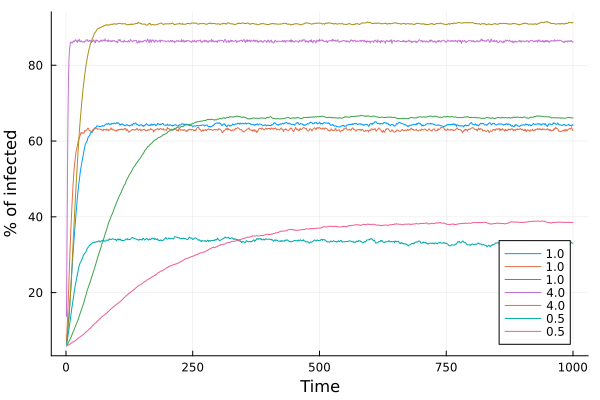

In [14]:
# Script launching predictions on different diseases on karat7 and printing 
# the precentage of infected at each time step.
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

predictions, taus = Simulation_SIS(karat7,2,betas,alphas,1000,1000)

Plots.plot(predictions, label=taus',xlabel="Time",ylabel="% of infected")

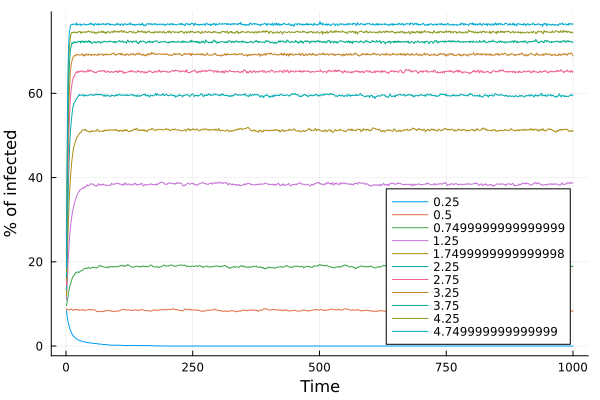

In [15]:
# Same as before but applied on toulouse_neigh. May be a bit long to run.
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIS(toulouse_neigh,100,betas,alphas,1000,100)

Plots.plot(predictions, label=taus', legend= :bottomright,xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 7 (written):</strong> Change the initial number of infected in the scripts above, is it in accordance with your answer in Question 2 ?
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: Le tau d'individus infectés converge plus lentement lorsqu'on réduit le nombre initial d'infectés. Cela confirme notre réponse à la question 2: plus le nombre initial d'infectés est élévé, plus la propagation est rapide. </strong></div>

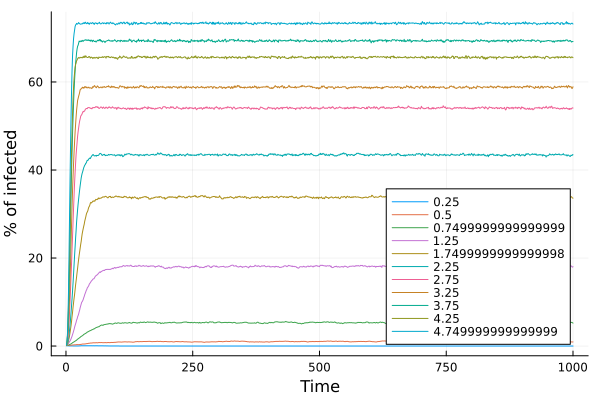

In [16]:
# Change the initial number of infected

betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIS(toulouse_neigh,1,betas,alphas,1000,100)

Plots.plot(predictions, label=taus', legend= :bottomright,xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 8 (code):</strong> Implement a script plotting the maximum percentage of infected people according to $\tau$ over 300 time steps for 3 contact networks:

* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.

You can use the function <code>random_regular_graph(n,d)</code> of LighGraphs. As you probably need to use a certain number of different values of $\tau$ to visualize something interesting (the more there are the more the figure will be smooth) you should fix $\alpha$ and make $\beta$ vary. 

<span style="font-size:0.9em">A regular graph is a graph where each vertex has the same degree.</span>

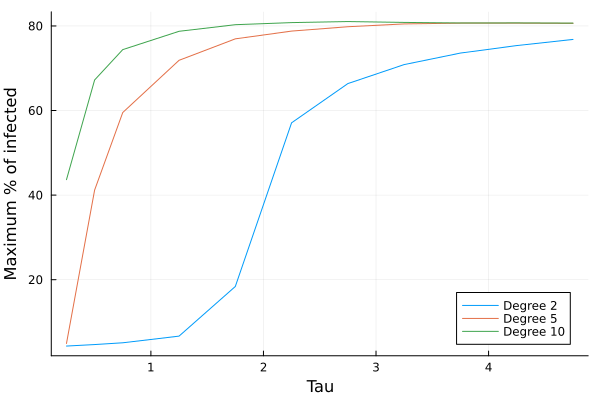

In [17]:
# Plots of the maximum percentage of infected people according to tau over 300 time 
# steps for 3 contact networks.

alpha = 0.2
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
taus = betas ./ alpha

graph1 = random_regular_graph(200, 2)
graph2 = random_regular_graph(200, 5)
graph3 = random_regular_graph(200, 10)

max1 = zeros(length(betas),1)
max2 = zeros(length(betas),1)
max3 = zeros(length(betas),1)

for i in 1:length(betas)
    simu1, _ = Simulation_SIS(graph1,10,[betas[i]],alpha,300,100)
    simu2, _ = Simulation_SIS(graph2,10,[betas[i]],alpha,300,100)
    simu3, _ = Simulation_SIS(graph3,10,[betas[i]],alpha,300,100)

    max1[i]= maximum(simu1)
    max2[i]= maximum(simu2)
    max3[i]= maximum(simu3)
end


#plotting the maximum percentage of infected people according to $\tau$ over 300 time steps for 3 contact networks

Plots.plot(taus,max1, label="Degree 2",xlabel="Tau",ylabel="Maximum % of infected")
Plots.plot!(taus,max2, label="Degree 5")
Plots.plot!(taus,max3, label="Degree 10")



<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 9 (written):</strong> Describe the figure and draw conclusions on the epidemic behavior for different degrees $d$ on regular graphs. Thus, in addition of the inner properties of the disease ($\alpha$, $\beta$, $\tau$) what other parameter is essential in the spreading ? Finally, what analogy can be done with real life from this experiment ?
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: On remarque que le tau maximum d'individus affectés augmente en fonction du $\tau$ de la maladie et du degrès du graphe. Donc, plus le réseau possède de connections entre individus, plus le pourcentage d'infectés à la stabilisation de la maladie sera élevé. La propagation d'une maladie ne dépend donc pas seulement de ces paramètres propres mais également de l'environnement dans laquelle elle se propage: le nombre de connections entre individus, le nombre d'individus, etc...
Dans la vrai vie, on peut donc conclure que des mesures visant à réduire les contacts (comme des confinements, port du masque, limitation du nombres de personnes dans des endroits confinés) permettent bien de réduire la prolifération d'une épidémie. </strong></div>

<div style="width:75%;margin:0 auto;">

## Part 2 - SIR and SAIR model
<a id='part2'></a>
    
<p style="text-align:justify;">Unfortunately SIS model is valuable for diseases we can catch back since a cured person can get ill again. This is true for the flu, the cold, etc. However COVID-19 might create immunity for whom already got it and SIS can not take into account immune or dead persons. That is why we propose in this part to consider another model more adapted to COVID-19 called SIR. It stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Recovered where the susceptible group contains those who remain susceptible to the infection, the infected group consists of those who not only have the disease but are also in the contagious period of the disease, and the recovered group contains those who were ill, got cured, are not contagious and can not get ill anymore.</p>

<br>

<p style="font-size:0.9em">M. Youssef and C. Scoglio, <cite>"An individual-based approach to SIR epidemics in contact networks"</cite>, Journal of Theoretical Biology 283 (2011)</p>

<br>
    
<p style="text-align:justify;"> One limitation of SIR is that it does not model the reaction of humans when they feel the presence of the epidemic. Indeed, if feeling threaten or surrounded by infected, an individual may change its behaviors: wear mask, wash its hands, etc. This result in a smaller infection rate. That is why in this part we will also consider a variant of SIR called SAIR which stands for Susceptible $\rightarrow$ Alert $\rightarrow$ Infected $\rightarrow$ Recovered. A susceptible individual becomes infected by the infection rate $\beta_0$, an infected individual recovers and gets immune by the curing rate $\alpha$, an individual can observe the states of its neighbors, then a susceptible individual might go to the alert state if surrounded by infected individuals with an alert rate $\kappa$ on each contact with an infected, an alert inividual becomes infected by the infection rate $\beta_1$ where $0<\beta_1<\beta_0$. In our simple SAIR model, an individual can not go back to a susceptible state when he got into the alert state.</p>
    
<br>
    
<p style="font-size:0.9em"> F. Darabi Sahneh and C. Scoglio, <cite>"Epidemic Spread in Human Networks"</cite>, 50th IEEE Conf. Decision and Contol, Orlando, Florida (2011)</p>

<div style="width:75%;margin:0 auto;">

### 2.1 SIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, and Recovered=2.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 10 (code):</strong> Implement the <code>function SIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Recovered vertices should appear in a different color (<code>colorant"purple"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIR(net,state,beta,alpha,t)</code> with your code.</span>

In [18]:
function SIR(net,state,beta,alpha,t)
    """Take a contact network at a certain state and apply t time steps
    of an SIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """
    new_state = copy(state)

    for i in 1:t
        # Infection
        for j in 1:nv(net)
            if new_state[j] == 0
                for k in neighbors(net,j)
                    if state[k] == 1
                        if rand() < beta
                            new_state[j] = 1
                            break
                        end
                    end
                end
            end
        end
        
        # Cure
        for j in 1:nv(net)
            if new_state[j] == 1
                if rand() < alpha
                    new_state[j] = 2
                end
            end
        end
    end

    return new_state
end

SIR (generic function with 1 method)

In [19]:
# Test on Karat7
nodecolorSIR = [colorant"lightseagreen", colorant"orange", colorant"purple"]

new_state_k7 = SIR(karat7,state_k7,0.8,0.2,10)

new_nodefillc_k7 = nodecolorSIR[new_state_k7 .+ 1]
draw(PNG("karat7_infectedSIR_10.png", 100cm, 100cm), gplot(karat7, nodefillc=new_nodefillc_k7))


In [20]:
# Test on N7_2A

new_state_n7 = SIR(n7_2A,state_2a,0.8,0.1,10)

new_nodefillc_n7 = nodecolorSIR[new_state_n7 .+ 1]
draw(PNG("N7_2A_infectedSIR_10.png", 100cm, 100cm), gplot(n7_2A, nodefillc=new_nodefillc_n7))


In [21]:
# Test on Toulouse_neigh

new_state_tls = SIR(toulouse_neigh,state_tls,0.8,0.1,10)

new_nodefillc_toulouse = nodecolorSIR[new_state_tls .+ 1]
draw(PNG("toulouse_neigh_infectedSIR_10.png", 100cm, 100cm), gplot(toulouse_neigh, nodefillc=new_nodefillc_toulouse))

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 11 (code):</strong> Implement the <code>function Simulation_SIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

In [22]:
function Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas (Array{Float64,1}): array of infection rate on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Recovered: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    # Initialization
    nb_diseases = length(betas)
    n = nv(net)
   
    # Prediction of the percentage of infected
    prediction = zeros(t,nb_diseases,3)

    # Effective spreading rat # Initialization
    nb_diseases = length(betas)
    n = nv(net)
       
    # Prediction of the percentage of infected
    prediction = zeros(t,nb_diseases,3)
    
    # Effective spreading rate
    taus = betas ./ alphas
       
    # Simulation
    
    for i in 1:nb_diseases
        for j in 1:nbsimu
            # Initialization
            state = zeros(Int32, n)
            infected = rand(1:n, nbinf)
            state[infected] = ones(Int32, nbinf)
           
            # Simulation
            for k in 1:t
                state = SIR(net,state,betas[i],alphas[i],1)
                prediction[k,i,1] += sum(state .== 1) / n *100  # % Infected
                prediction[k,i,2] += sum(state .== 2) / n *100  # % Recovered
                prediction[k,i,3] += sum(state .== 0) / n *100  # % Susceptible
            end
        end
    end
    
    for i in 1:3
        prediction[:,:,i] = prediction[:,:,i] ./ nbsimu # Average over the simulations
    end
    return (prediction, taus)
end

Simulation_SIR (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 12 (written):</strong> Run the script below and describe what you see. Why the infected curve does not behave the same as for SIS ? 
    
<br>

<div style="background-color:#E7F1D1"> <strong>Answer: Pour SIS, le tau d'infectés ne diminue pas car une personne guérie peut être réinfectée. Pour SIR, une personne guérie ne peut plus être infectée. On remarque donc que le nombre d'infectés augmente puis diminue après avoir atteint un pic. Ce pic semble correspondre au moment où le pourcentage d'individus guéris (et donc immunisés) dépasse le pourcentage d'individus susceptibles d'attraper la maladie. Lorsque le tau d'individu guéris atteint 100%, le tau d'individu infectés est de 0%. Dans la vrai vie, c'est ce qu'on peut appeler une "immunité collective". </strong></div>
 </strong></div>

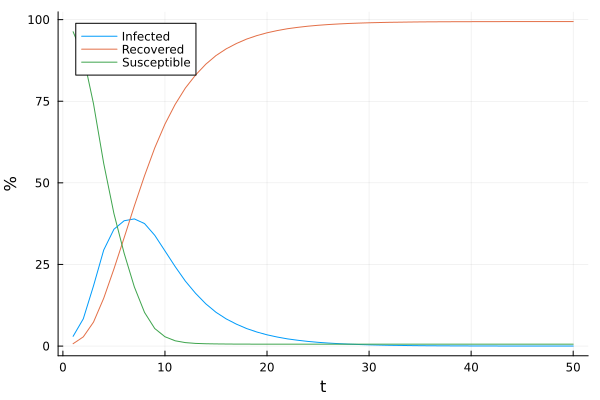

In [23]:
# Script launching prediction on one disease on n7_2A and plotting the percentage
# of infected, susceptible and recovered at each time step.
predictions, taus = Simulation_SIR(n7_2A,2,[0.3],[0.2],50,1000)

Plots.plot([predictions[:,:,1] predictions[:,:,2] predictions[:,:,3]],
           label=["Infected" "Recovered" "Susceptible"],xlabel="t",ylabel="%")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 13 (written):</strong> As for Question 6 script 2 plot the evolution of the percentage of infected for many $\tau$. Describe what you see.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: Le pourcentage d'infectés maximal (pic) est plus élevé pour des taux grands. Cela est cohérent et les observations confirment le test précédents. Pour des taux très faibles (< 0.5), le pourcentage d'infectés diminue immédiatement. Pour tous les taux, le pourcentage d'infectés finit toujours se stabiliser à 0. </strong></div>

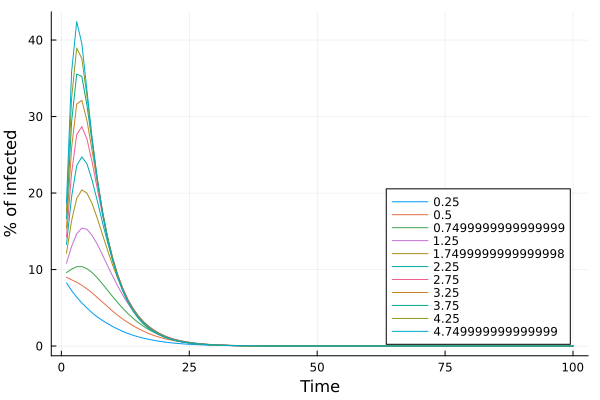

In [24]:
# Equivalent experiment as for Question 6 script 2


betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIR(toulouse_neigh,100,betas,alphas,100,1000)

Plots.plot(predictions[:,:,1], label=taus', legend= :bottomright,xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 14 (code):</strong> Implement a script plotting the number of infected over 75 time steps for $\beta=0.3$ and $\alpha=0.2$ fixed and on 3 contact networks:
    
* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.
    

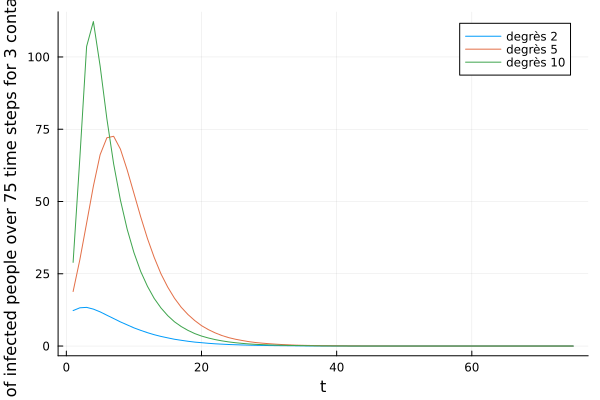

In [25]:
# Plots of the number of infected people according to tau over 75 time 
# steps for 3 contact networks.


alpha = 0.2
beta = 0.3
taus = beta ./ alpha

graph1 = random_regular_graph(200, 2)
graph2 = random_regular_graph(200, 5)
graph3 = random_regular_graph(200, 10)

simu1 = zeros(75)
simu2 = zeros(75)
simu3 = zeros(75)


prediction1, _ = Simulation_SIR(graph1,10,beta,alpha,75,1000)
prediction2, _ = Simulation_SIR(graph2,10,beta,alpha,75,1000)
prediction3, _ = Simulation_SIR(graph3,10,beta,alpha,75,1000)

for i in 1:75
    simu1[i] = prediction1[i,1,1]*nv(graph1)/100
    simu2[i] = prediction2[i,1,1]*nv(graph2)/100
    simu3[i] = prediction3[i,1,1]*nv(graph3)/100
end

    
#plotting the number of infected people over 75 time steps for 3 contact networks

Plots.plot([simu1 simu2 simu3],label=["degrès 2" "degrès 5" "degrès 10"],xlabel="t",ylabel="number of infected people over 75 time steps for 3 contact networks")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 15 (written):</strong> From the previous figure, explain why lockdown can be interesting when hospital places are lacking ?

<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: On remarque que le nombre d'infectés maximal atteint augmente avec le degrès du graphe utilisé pour la simulation. La conclusion peut être similaire qu'avant: plus le graphe est dense, plus le nombre d'infectés maximal atteint est élevé, donc plus il y a de contacts entre les individus, plus la propagation est importante. Donc, quand la place manque dans les hopitaux, il est en effet intéressant de recourir à des mesures de confinement. Mettre en contact un nombre élevé de malades dans un même endroit (l'hôpital) risque d'augmenter la propagation du virus.
</strong></div>

<div style="width:75%;margin:0 auto;">

### 2.2 SAIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, Recovered=2, and Alert=3.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 16 (code):</strong> Implement the <code>function SAIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Alerted vertices should appear in a different color (<code>colorant"lightgreen"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SAIR(net,state,beta0,beta1,alpha,kappa,t)</code> with your code.</span>

In [26]:
function SAIR(net,state,beta0,beta1,alpha,kappa,t)
    """Take a contact network at a certain state and apply t time steps
    of an SAIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta0 (Float64): infection rate when not alert
       beta1 (Float64): infection rate when alert
       alpha (Float64): curing rate
       kappa (Float64): alerting rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
        unction Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)
        Take a contact network, different diseases (defined by 
        different parameters alpha and beta), a number of initial
        infected people and process nbsimu simulations of SIR over
        t time steps. You will provide the prediction of the 
        percentage of infected at each time t as well as the 
        spreading rate of each disease.
        
        """
        new_state = copy(state)

        for i in 1:t
            # Infection
            for j in 1:nv(net)
                if new_state[j] == 0 || new_state[j] == 3
                    for k in neighbors(net,j)
                        if state[k] == 1
                            if (rand() < beta0 && new_state[j] == 0) || (rand() < beta1 && new_state[j] == 3)
                                new_state[j] = 1
                                # Alerte des voisins
                                if rand() < kappa
                                    for p in neighbors(net,j)
                                        if state[p] == 0
                                            new_state[p] = 3
                                        end
                                    end
                                end
                            end
                        end
                    end
                end
            end
            
            # Cure
            for j in 1:nv(net)
                if new_state[j] == 1
                    if rand() < alpha
                        new_state[j] = 2
                    end
                end
            end
        end
    
        return new_state
    end
      

SAIR (generic function with 1 method)

In [27]:
# Test on Karat7

nodecolorSAIR = [colorant"lightseagreen", colorant"orange", colorant"purple", colorant"green"]

new_state_k7 = SAIR(karat7,state_k7,0.7,0.3,0.2,0.4,10)

new_nodefillc_k7 = nodecolorSAIR[new_state_k7 .+ 1]
draw(PNG("karat7_infectedSAIR_10.png", 100cm, 100cm), gplot(karat7, nodefillc=new_nodefillc_k7))


In [28]:
# Test on N7_2A

new_state_n7 = SAIR(n7_2A,state_2a,0.7,0.3,0.2,0.4,10)

new_nodefillc_n7 = nodecolorSAIR[new_state_n7 .+ 1]
draw(PNG("N7_2A_infectedSAIR_10.png", 100cm, 100cm), gplot(n7_2A, nodefillc=new_nodefillc_n7))

In [29]:
# Test on Toulouse_neigh

new_state_tls = SAIR(toulouse_neigh,state_tls,0.7,0.3,0.2,0.4,10)

new_nodefillc_toulouse = nodecolorSAIR[new_state_tls .+ 1]
draw(PNG("toulouse_neigh_infectedSAIR_10.png", 100cm, 100cm), gplot(toulouse_neigh, nodefillc=new_nodefillc_toulouse))

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 17 (code):</strong> Implement the <code>function Simulation_SAIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)</code> with your code.</span>

In [30]:
function Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SAIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas0 (Array{Float64,1}): array of infection rate when not alert on edges
       betas1 (Array{Float64,1}): array of infection rate when alert on edges
       alphas (Array{Float64,1}): array of curing rate on vertices 
       kappas (Array{Float64,1}): array of alerting rate on edges
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Recovered: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """

   # Initialization
   nb_diseases = length(betas0)
   n = nv(net)
   
   # Prediction of the percentage of infected
   prediction = zeros(t,nb_diseases,3)

   # Effective spreading rate
   taus = betas ./ alphas
   
   # Simulation

   for i in 1:nb_diseases
        for j in 1:nbsimu
            # Initialization
            state = zeros(Int32, n)
            infected = rand(1:n, nbinf)
            state[infected] = ones(Int32, nbinf)
            
            # Simulation
            for k in 1:t
                    state = SAIR(net,state,betas0[i],betas1[i],alphas[i],kappas[i],1)
                    prediction[k,i,1] += sum(state .== 1) / n *100
                    prediction[k,i,2] += sum(state .== 2) / n *100
                    prediction[k,i,3] += (sum(state .== 0) + sum(state .== 3)) / n *100

            end
        end
   end

   for i in 1:3
       prediction[:,:,i] = prediction[:,:,i] ./ nbsimu
   end

   return (prediction, taus)
end

Simulation_SAIR (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 18 (written):</strong> Run the script below comparing the number of infected of SAIR and SIR and comment what you see.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: On remarque que la forme des courbes est similaire mais que le pourcentage d'infectés est plus élevé pour la simulation SIR. Cela est cohérent: en effet, les personnes alertées ont moins de chance d'être infectées. Cette simulation se rapproche plus de la réalité.
</strong></div>

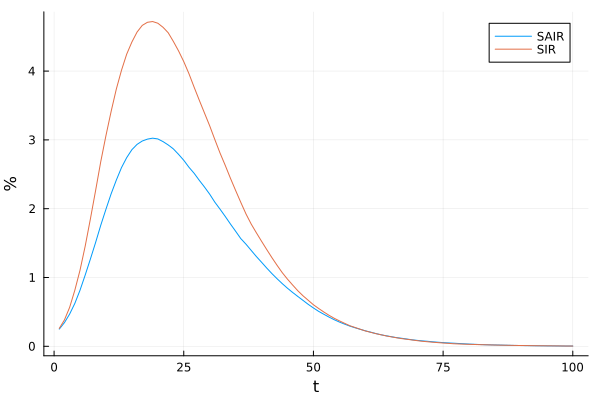

In [31]:
# Script launching prediction on one disease on toulouse_neigh and plotting the percentage
# of infected at each time step for SIR and SAIR.
predictions1, taus1 = Simulation_SAIR(toulouse_neigh,2,[0.2],[0.1],[0.1],[0.4],100,1000)
predictions2, taus2 = Simulation_SIR(toulouse_neigh,2,[0.2],[0.1],100,1000)

Plots.plot([predictions1[:,:,1] predictions2[:,:,1]],
           label=["SAIR" "SIR"],xlabel="t",ylabel="%")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 19 (written):</strong> Of course the presented SIS, SIR, and SAIR models are limitated in their modelization of the reality. Formulate few of these limitations (at least 2). 
Propose few algorithm addons/ideas (at least 2) which would make the models more complex and more accurate in regards to the reality.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer: Certaines limitations existent dans les modèles SIS, SIR et SAIR. Par exemple, les modèles ne prennent pas en compte les personnes qui sont immunisées (naturellement ou avec des vaccins) ou au contraire qui sont plus susceptibles d'attraper la maladie (immunodéprimées). Ils ne prennent pas en compte les personnes qui sont asymptomatiques (et qui dont ont moins de chance d'alerter l'entourage). Enfin, ils ne prennent pas en compte les personnes qui meurent de la maladie. Pour améliorer les modèles, on peut ajouter des états supplémentaires (par exemple, morts) et paramètres supplémentaires comme les taux d'infections selon les caractéristiques des individus (immunodéprimés, asymptomatiques...)ou encore un tau de mortalité.
On pourrait supposer que chaque individu possède une liste d'attributs le caractérisant, et créer une fonction qui calcule ses probabilités d'infection, d'alerte, de mortalité etc propres à partir de ses attraitbuts.</strong></div>

<div style="width:75%;margin:0 auto;">

## Part 3 - Discover patient zero
    
<p style="text-align:justify;"> In the two previous parts you may have realised that understanding and controlling the spread of epidemics on contact networks is an important task. However, information about
the origin of the epidemic could be also extremely useful to reduce or prevent future outbreaks. Thus, in this part we will focus on algorithm solutions to answer this issue.</p>
    
<p style="text-align:justify;"> The stochastic nature of infection propagation makes the estimation of the epidemic origin intrinsically hard: indeed, different initial conditions can lead to the same configuration at the observation time. Methods such as the distance centrality or the Jordan center try to approximate it. They both rely on spatial information by stating that the first infected is probably at the center of the cluster of infection. Mathematically:
    
* The jordan center is expressed as $\min_{v\in \mathcal{I}}\max_{n\in \mathcal{I}}d(v,n)$ where $\mathcal{I}$ is a connected component of the original contact network containing all infected and recovered vertices, and where $d(\cdot,\cdot)$ is the distance (= the shortest path) between 2 vertices (if not weighted graph each edge accounts for 1 unit). 
* The distance centrality is expressed as $\min_{v\in \mathcal{I}}\sum_{n\in \mathcal{I}}d(v,n)(\delta_{n,I} + \delta_{n,R}/\alpha)$, where $\delta_{n,I}=1$ if the vertex n is infected ($=0$ otherwise), and where $\delta_{n,R}=1$ if the vertex n is recovered ($=0$ otherwise). You may note that in distance centrality we increase the weight of the recovered vertices by a factor $1/\alpha$, it translates the fact that recovered vertices tend to be closer to the origin of the epidemic since they probably got ill before.
    
    
We formulate the problem as follow: given a contact network and a snapshot of epidemic spread at a certain time, determine the infection source. A snapshot is a given <code>state</code> array for a contact network.</p>

<br>
    
<p style="font-size:0.9em"> A. Y. Lokhov, M. Mézard, H. Ohta, and L. Zdeborová, <cite>"Inferring the origin of an epidemic with a dynamic message-passing algorithm"</cite>, Physical Review (2014)</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 20 (code):</strong> Implement the <code>function jordan</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = jordan(g,state,alpha)</code> with your code.</span>

In [32]:
function jordan(g,state)
    """Find patient zero by mean of the jordan center method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    I = findall(x->(x==1)|(x==2),state) # Vertices infected or recovered
    I_barre = findall(x->(x==0)|(x==3),state) # Vertices not infected or recovered 
    mini = typemax(Int64)
    individu_zero = -1
    for individu in I
        dijkstra = dijkstra_shortest_paths(g,individu)
        distances = dijkstra.dists
        distances[I_barre] = zeros(length(I_barre)) # We don't want to take into account the vertices not infected or recovered
        
        maxi = maximum(distances)
        if mini > maxi
            mini = maxi
            individu_zero = individu
        end
    end
    return individu_zero
end

jordan (generic function with 1 method)

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 21 (code):</strong> Implement the <code>function distance</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = distance(g,state,alpha)</code> with your code.</span>

In [33]:
function distance(g,state,alpha=1.)
    """Find patient zero by mean of the distance centrality method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
        alpha (Float64): curing rate
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    I = findall(x->(x==1)|(x==2),state) # Vertices infected or recovered
    Ii = findall(x->(x==1),state) # Vertices infected 
    Ir = findall(x->(x==2),state) # Vertices recovered
    I_barre = findall(x->(x==0)|(x==3),state) # Vertices not infected or recovered 
    individu_min = -1
    Somme_min = typemax(Int64)
    for individu in I
        dijkstra = dijkstra_shortest_paths(g,individu)
        distances = dijkstra.dists
        distances[I_barre] = zeros(length(I_barre)) # We don't want to take into account the vertices not infected or recovered
        distances[Ir] = distances[Ir]/alpha
        Somme = sum(distances)
        if Somme_min > Somme
            Somme_min = Somme
            individu_min = individu
        end
    end
    return individu_min
end

distance (generic function with 2 methods)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 22 (written):</strong> Run the 3 following scripts using your functions <code>jordan</code> and <code>distance</code> and comment on the results.
    
The contact network is karat7 for 2 different patient zero and a $50\times 50$ grid. The real patient zero ("Z"), your jordan ("J") and distance ("D") approximations are appearing in <code>colorant"lightblue"</code>.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong> Answer: Pour le premier graphe, le patient zéro réel correspond à celui trouvé par nos fonctions jordan et distance. On remarque aussi pour les autres graphe que Distance est plus proche du patient zéro réel que Jordan car il prend en compte de façon plus importante les patients rétablis puisqu'ils sont en théorie malades depuis plus longtemps. Le patient zéro trouvé par Jordan est quant à lui plus au centre de l'ensemble I des individues malades ou retablies.
On peut constater que les algorithmes donnent des résultats précis quand le patient 0 a beaucoup de connections.
Remarque : Pour le graphe 2, distance peut trouver le patient 0 si on retourne le dernière individu de distance minimal (cela revient à mettre un >= ligne 24 au lieu du >).</strong></div>

In [34]:
# Loading a snapshot of karat7
@load "karat7_Q22_1.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.smallgraph(:karate)
# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="D+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="D+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="D+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="D"
else
    labels[cent_pat_zero]="D"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_1.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/lweisbec/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495


In [35]:
# Loading a snapshot of karat7
@load "karat7_Q22_2.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.smallgraph(:karate)
# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="D+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="D+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="D+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="D"
else
    labels[cent_pat_zero]="D"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_2.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/lweisbec/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495


In [36]:
# Loading a snapshot of grid50
@load "grid50_Q22.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.grid([50,50])

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="D+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="D+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="D+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="D"
else
    labels[cent_pat_zero]="D"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("grid50_Q22.png", 100cm, 100cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/lweisbec/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495
